In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Hyperparamètres
input_dim = 28 * 28  # Taille des images aplaties
hidden_dim = 128
output_dim = 10 
batch_size = 32
learning_rate = 0.001
num_epochs = 30

# Prétraitement des données
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir en tenseur
    transforms.Normalize((0.5,), (0.5,))  # Normalisation
])

# Charger les données MNIST
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [9]:
# Définir le modèle MLP
class MLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.2):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout_rate),
            nn.Linear(hidden_dim, output_dim),
            nn.LogSoftmax(dim=1)  # Pour la classification multi-classes
        )

    def forward(self, x):
        return self.model(x)

In [10]:
mlp = MLP(input_dim, hidden_dim, output_dim, dropout_rate=0)
criterion = nn.NLLLoss()
optimizer = optim.SGD(mlp.parameters(), lr=learning_rate)

train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    mlp.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        # Aplatir les images
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = mlp(images)
        loss = criterion(outputs, labels)

        # Backward pass et mise à jour des poids
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

mlp.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = mlp(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/30], Loss: 2.2654
Epoch [2/30], Loss: 2.0551
Epoch [3/30], Loss: 1.3388
Epoch [4/30], Loss: 0.8088
Epoch [5/30], Loss: 0.6139
Epoch [6/30], Loss: 0.5038
Epoch [7/30], Loss: 0.4417
Epoch [8/30], Loss: 0.4065
Epoch [9/30], Loss: 0.3833
Epoch [10/30], Loss: 0.3669
Epoch [11/30], Loss: 0.3540
Epoch [12/30], Loss: 0.3431
Epoch [13/30], Loss: 0.3335
Epoch [14/30], Loss: 0.3247
Epoch [15/30], Loss: 0.3163
Epoch [16/30], Loss: 0.3087
Epoch [17/30], Loss: 0.3008
Epoch [18/30], Loss: 0.2935
Epoch [19/30], Loss: 0.2869
Epoch [20/30], Loss: 0.2801
Epoch [21/30], Loss: 0.2735
Epoch [22/30], Loss: 0.2672
Epoch [23/30], Loss: 0.2612
Epoch [24/30], Loss: 0.2554
Epoch [25/30], Loss: 0.2495
Epoch [26/30], Loss: 0.2440
Epoch [27/30], Loss: 0.2388
Epoch [28/30], Loss: 0.2337
Epoch [29/30], Loss: 0.2286
Epoch [30/30], Loss: 0.2239
Test Accuracy: 93.60%


In [11]:
mlp_w_dropout = MLP(input_dim, hidden_dim, output_dim, dropout_rate=0.2)
criterion = nn.NLLLoss()
optimizer = optim.SGD(mlp_w_dropout.parameters(), lr=learning_rate)

do_train_losses = []
do_train_accuracies = []

for epoch in range(num_epochs):
    mlp_w_dropout.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        # Aplatir les images
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = mlp_w_dropout(images)
        loss = criterion(outputs, labels)

        # Backward pass et mise à jour des poids
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    do_train_losses.append(running_loss / len(train_loader))
    do_train_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

mlp_w_dropout.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = mlp_w_dropout(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

do_test_accuracy = 100 * correct / total
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/30], Loss: 2.2854
Epoch [2/30], Loss: 2.1791
Epoch [3/30], Loss: 1.7594
Epoch [4/30], Loss: 1.1920
Epoch [5/30], Loss: 0.8997
Epoch [6/30], Loss: 0.7588
Epoch [7/30], Loss: 0.6674
Epoch [8/30], Loss: 0.6053
Epoch [9/30], Loss: 0.5563
Epoch [10/30], Loss: 0.5228
Epoch [11/30], Loss: 0.4921
Epoch [12/30], Loss: 0.4672
Epoch [13/30], Loss: 0.4430
Epoch [14/30], Loss: 0.4290
Epoch [15/30], Loss: 0.4147
Epoch [16/30], Loss: 0.3970
Epoch [17/30], Loss: 0.3839
Epoch [18/30], Loss: 0.3720
Epoch [19/30], Loss: 0.3624
Epoch [20/30], Loss: 0.3485
Epoch [21/30], Loss: 0.3394
Epoch [22/30], Loss: 0.3323
Epoch [23/30], Loss: 0.3200
Epoch [24/30], Loss: 0.3150
Epoch [25/30], Loss: 0.3040
Epoch [26/30], Loss: 0.2971
Epoch [27/30], Loss: 0.2917
Epoch [28/30], Loss: 0.2853
Epoch [29/30], Loss: 0.2769
Epoch [30/30], Loss: 0.2731
Test Accuracy: 93.97%


In [14]:
from BayesianNeuralNetwork import BayesianNN
import torch.nn.functional as F

hidden_dim = 128
num_hidden_layers = 2
kl_weight = 1e-6

model = BayesianNN(input_size=input_dim, output_size=output_dim, num_hidden_layers=num_hidden_layers, layer_width=hidden_dim)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

bay_train_losses = []
bay_train_accuracies = []

tracked_mu = [model.net[0].mu[0, 0].item()]
tracked_sigma = [model.net[0].rho[0, 0].item()]


for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Ajouter la perte KL
        kl_loss = model.compute_total_kl_loss()
        total_loss = loss +  kl_weight * kl_loss

        # Backward pass et mise à jour des poids
        optimizer.zero_grad()
        total_loss.backward()
        optimizer.step()

        running_loss += total_loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    first_layer = model.net[0]  # Première couche (BayesianLayer)
    tracked_mu.append(first_layer.mu[0, 0].item())
    tracked_sigma.append(F.softplus(first_layer.rho[0, 0]).item())

    bay_train_losses.append(running_loss / len(train_loader))
    bay_train_accuracies.append(100 * correct / total)

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader):.4f}")

# Évaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

bay_test_accuracy = 100 * correct / total
print(f"Test Accuracy: {100 * correct / total:.2f}%")

Epoch [1/30], Loss: 5031.9326
Epoch [2/30], Loss: 862.4641
Epoch [3/30], Loss: 612.1044
Epoch [4/30], Loss: 594.7782


KeyboardInterrupt: 

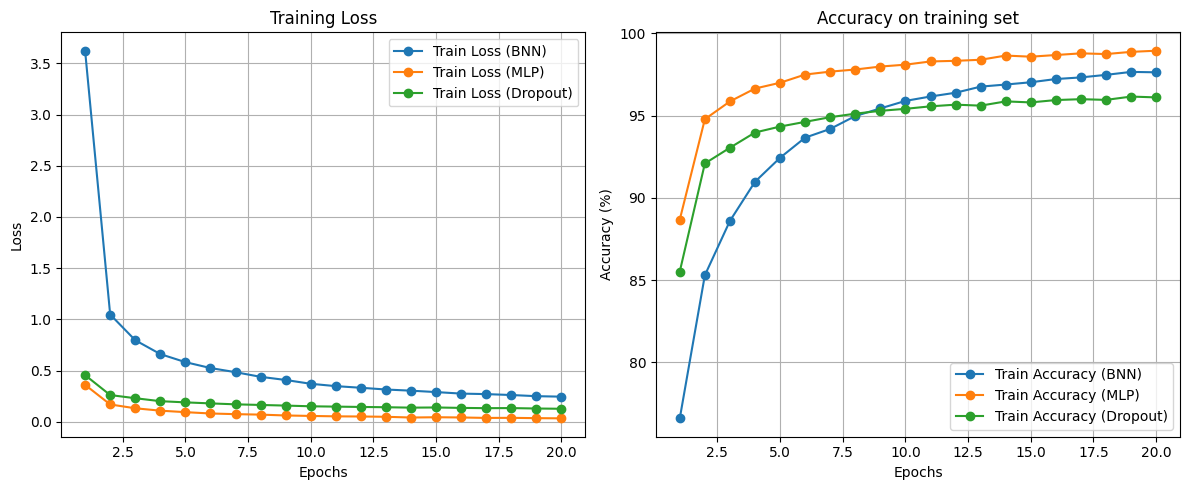

Test accuracy (MLP): 97.23
Test accuracy (BNN): 96.51
Test accuracy (Dropout): 97.43


In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Courbe de la perte
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), bay_train_losses, label='Train Loss (BNN)', marker='o')
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss (MLP)', marker="o")
plt.plot(range(1, num_epochs + 1), do_train_losses, label="Train Loss (Dropout)", marker="o")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.grid()

# Courbe de l'accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), bay_train_accuracies, label='Train Accuracy (BNN)', marker='o')
plt.plot(range(1, num_epochs + 1), train_accuracies, label="Train Accuracy (MLP)", marker="o")
plt.plot(range(1, num_epochs + 1), do_train_accuracies, label="Train Accuracy (Dropout)", marker="o")
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy on training set')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
print("Test accuracy (MLP):", test_accuracy)
print("Test accuracy (BNN):", bay_test_accuracy)
print("Test accuracy (Dropout):", do_test_accuracy)

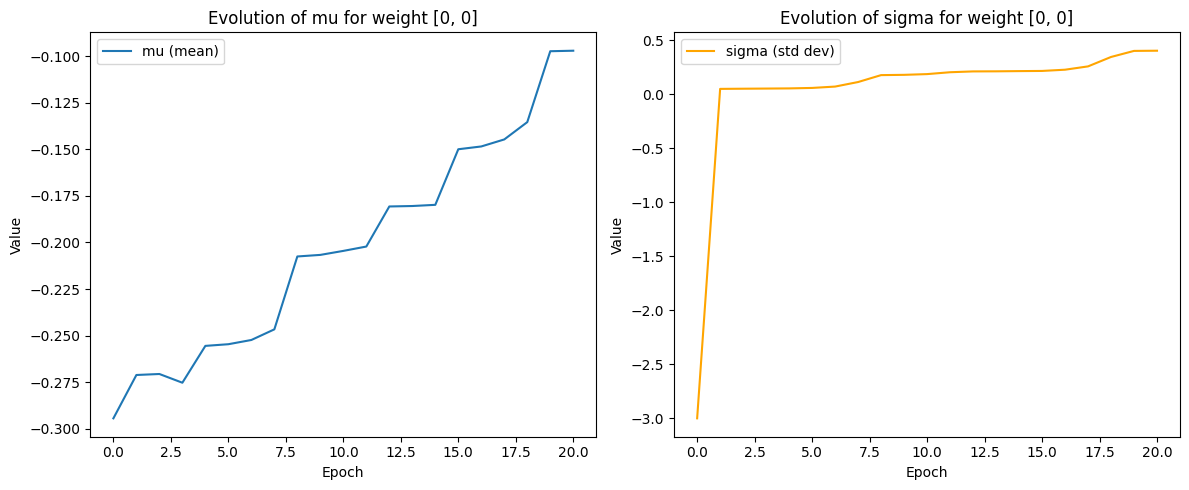

In [72]:
# Affichage des variations de mu et sigma
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(tracked_mu, label="mu (mean)")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Evolution of mu for weight [0, 0]")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(tracked_sigma, label="sigma (std dev)", color="orange")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.title("Evolution of sigma for weight [0, 0]")
plt.legend()

plt.tight_layout()
plt.show()

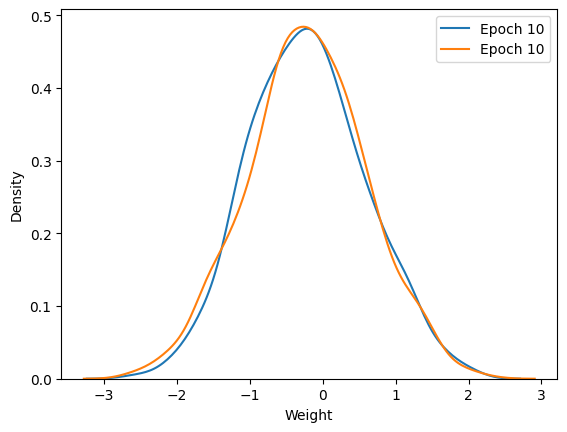

In [ ]:
import numpy as np
import seaborn as sns 


for i in [num_epochs//2, 10]:
    eps = np.random.normal(0, 1, size=1000)
    dist = tracked_mu[i] + np.log(1 + np.exp(tracked_sigma[i])) * eps
    sns.kdeplot(dist, label=f"Epoch {i}", fill=False)

plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend()
plt.show()

## Weight Distribution

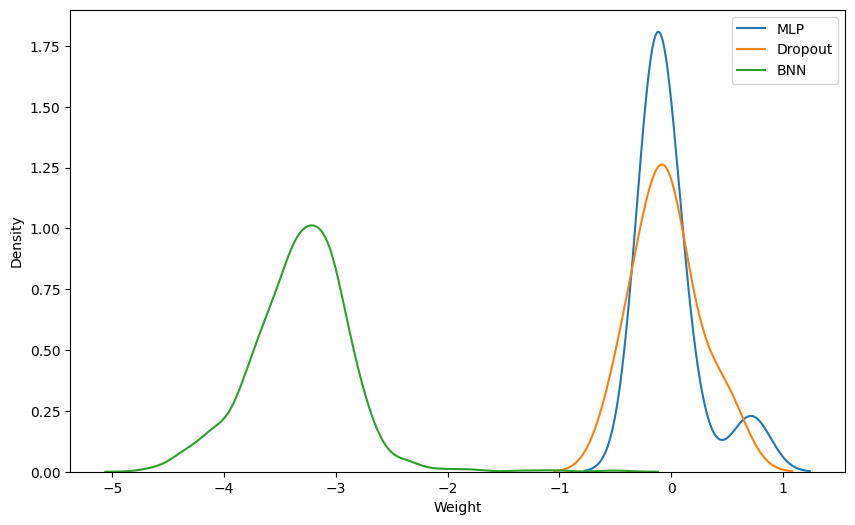

In [74]:
mlp_weights = mlp.parameters()
do_weights = mlp_w_dropout.parameters()
bay_weights = model.parameters()

mlp_weights_last_epoch = list(mlp_weights)[-1].detach().numpy()
do_weights_last_epoch = list(do_weights)[-1].detach().numpy()
bay_weights_last_epoch = list(bay_weights)[-1].detach().numpy()


plt.figure(figsize=(10, 6))
sns.kdeplot(mlp_weights_last_epoch.flatten(), fill=False, label="MLP")
sns.kdeplot(do_weights_last_epoch.flatten(), fill=False, label="Dropout")
sns.kdeplot(bay_weights_last_epoch.flatten(), fill=False, label="BNN")

plt.xlabel("Weight")
plt.ylabel("Density")
plt.legend()
plt.show()